<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab 3.02: Statistical Modeling and Model Validation

> Authors: Tim Book, Matt Brems

---

## Objective
The goal of this lab is to guide you through the modeling workflow. In this lesson, you will follow all best practices when slicing your data and validating your model. The goal of this lab is not necessarily to build the best model you can, but to build and evaluate a model, and interpret its results.

## Imports

In [2]:
# Import everything you need here.
# You may want to return to this cell to import more things later in the lab.
# DO NOT COPY AND PASTE FROM OUR CLASS SLIDES!
# Muscle memory is important!
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy import stats
import statsmodels.api as sm
from datetime import date

## Read Data
The `citibike` dataset consists of Citi Bike ridership data for over 224,000 rides in February 2014.

In [3]:
# Read in the citibike data in the data folder in this repository.
citibike = pd.read_csv('./data/citibike_feb2014.csv')

## Explore the data
Use this space to familiarize yourself with the data.

Convince yourself there are no issues with the data. If you find any issues, clean them here.

In [4]:
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1


In [5]:
citibike.describe().T

,count,mean,std,min,25%,50%,75%,max
tripduration,224736.0,874.519810,5486.092219,60.000000,360.000000,544.000000,845.000000,766108.000000
start station id,224736.0,439.203479,335.723861,72.000000,305.000000,403.000000,490.000000,3002.000000
start station latitude,224736.0,40.734366,0.019031,40.680342,40.721854,40.736197,40.749156,40.770513
start station longitude,224736.0,-73.990386,0.011853,-74.017134,-73.998522,-73.990617,-73.981918,-73.950048
end station id,224736.0,440.741995,341.497433,72.000000,305.000000,403.000000,488.000000,3002.000000
end station latitude,224736.0,40.734221,0.019048,40.680342,40.721816,40.735877,40.749013,40.770513
end station longitude,224736.0,-73.990521,0.011920,-74.017134,-73.999061,-73.990741,-73.981948,-73.950048
bikeid,224736.0,18010.598222,1987.769335,14529.000000,16302.000000,17975.000000,19689.000000,21542.000000
gender,224736.0,1.154617,0.436592,0.000000,1.000000,1.000000,1.000000,2.000000


In [6]:
citibike.shape

(224736, 15)

In [7]:
# time issues
citibike['starttime'] = pd.to_datetime(citibike['starttime'], format='%Y-%m-%d %H:%M:%S')
citibike['stoptime'] = pd.to_datetime(citibike['stoptime'], format='%Y-%m-%d %H:%M:%S')

In [8]:
citibike.isna().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [9]:
citibike.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                         object
gender                              int64
dtype: object

In [10]:
# first thing to notice is the \N column, we will simply delete these as they are errored results
citibike.replace(r'\N', np.nan,inplace=True)
citibike.dropna(subset=['birth year'],inplace=True) # getting an na even though it didn't show up in tallies
citibike['birth year'] = citibike['birth year'].astype('int64') # changin birth year to int

### Is average trip duration different by gender?

Conduct a hypothesis test that checks whether or not the average trip duration is different for `gender=1` and `gender=2`. Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly!

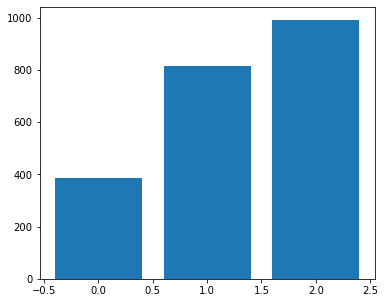

In [11]:
# based off this graph it appears gender does affect trip duration
x = citibike.groupby(['gender'])['tripduration'].agg('mean')
plt.figure(figsize=(6,5))
plt.bar(x.keys(),x.values);

In [12]:
# My hypothesis is that gender does affect the average trip duration of a bike ride
# THUS my null hypothesis is that gender doesn't affect the average trip duration of a bike ride
# and that those values are the same.
# H_o: u_gen1-u_gen2 = 0 [null]
# H_a: u_gen1-u_gen2 != 0 [my hypo]

# establishing two groups so we can calculate the means of both
gender_1 = citibike.loc[citibike['gender']==1,'tripduration'] 
gender_2 = citibike.loc[citibike['gender']==2,'tripduration'] 

# the mean of both of these two events will equal to zero if they are equivalent
print(gender_1.mean() - gender_2.mean())

t_stat, p_value = stats.ttest_ind(gender_1,gender_2)
print(t_stat,p_value)

# If gender truly did not matter, the percent chance that we see a value more extreme than -5 is 
# ~2.25e-192. Thus stating that we are highly certain that gender does affect trip duration
# Since our pvalue is lower than .05 we can reject the null hypothesis

-177.3286654549213
-5.929304472651931 3.046762685660303e-09


### What numeric columns shouldn't be treated as numeric?

**Answer:** gender, start station id, latitude, longitude, usertype

### Dummify the `start station id` Variable

In [13]:
citibike = pd.get_dummies(citibike, columns=['start station id','usertype','gender'],drop_first=True)

## Feature Engineering
Engineer a feature called `age` that shares how old the person would have been in 2014 (at the time the data was collected)
- Note: you will need to clean the data a bit.

In [14]:
citibike['age'] = date.today().year - citibike['birth year']

In [15]:
citibike['age']

0         30
1         42
2         73
3         40
4         31
          ..
224731    45
224732    36
224733    53
224734    39
224735    61
Name: age, Length: 218019, dtype: int64

## Split your data into train/test sets

Look at the size of your data. What is a good proportion for your split? **Justify your answer, considering the size of your data and the default split size in sklearn.**

Use the `tripduration` column as your `y` variable.

For your `X` variables, use `age`, `usertype`, `gender`, and the dummy variables you created from `start station id`. (Hint: You may find the Pandas `.drop()` method helpful here.) 

In [16]:
# Done below

## Fit a Linear Regression model in `sklearn` predicting `tripduration`.

In [17]:
X = citibike.drop(columns=['starttime','stoptime','start station name','start station latitude',
                                   'start station longitude','end station id','end station name','end station latitude',
                                   'end station longitude','bikeid','birth year','tripduration'])
y = citibike['tripduration']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2)
lr = LinearRegression()
lr.fit(X_train,y_train)
print(cross_val_score(lr,X_train, y_train, cv=5).mean())
print(lr.score(X_test,y_test))

-0.003420148023322378
-0.0037816533867955915


/Users/evanhoefling/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


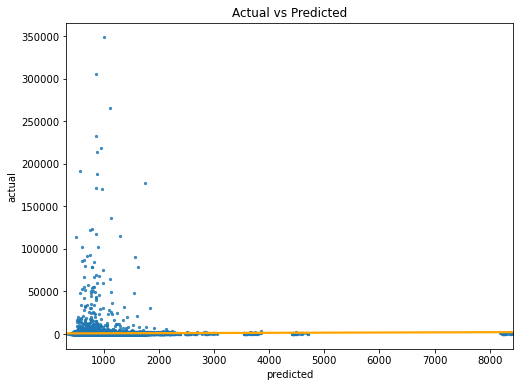

In [18]:
y_preds = lr.predict(X_test)
plt.figure(figsize=(8,6))
sns.regplot(y_preds,y_test,ci=None,scatter_kws={'s':5},line_kws={'color':'orange'});
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Actual vs Predicted');

## Evaluate your model
Look at some evaluation metrics for **both** the training and test data. 
- How did your model do? Is it overfit, underfit, or neither?
- Does this model outperform the baseline? (e.g. setting $\hat{y}$ to be the mean of our training `y` values.)

The model is overfit. It is running better on the training sample than the testing data. Since it is only correct ~.002 on our training set, I would say that the model has not out performed the baseline.

## Fit a Linear Regression model in `statsmodels` predicting `tripduration`.

In [21]:
x_train = sm.add_constant(X_train)
ols_mod = sm.OLS(y_train,x_train).fit()
ols_mod.params

const                    264.141510
start station id_79       -2.229394
start station id_82     -389.069734
start station id_83     -200.622588
start station id_116    -380.368636
                            ...    
start station id_2023   -254.294300
start station id_3002   -217.575874
gender_1                 545.985286
gender_2                 710.306530
age                        4.715651
Length: 332, dtype: float64

## Evaluate your model
Using the `statsmodels` summary, test whether or not `age` has a significant effect when predicting `tripduration`.
- Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly **in the context of your model**!

In [22]:
ols_mod.pvalues['age']

0.00010375037784718357

Seeing as the pvalue of age is 0, meaning seeming that it is safe to reject the null hypothesis, which is that age does not affect trip duration. Now this could change, we have a lot of garbage variables floating around in our model, if we decide to change features we would have to re-evaluate the p-score with the other variables taken into consideration.

## Citi Bike is attempting to market to people who they think will ride their bike for a long time. Based on your modeling, what types of individuals should Citi Bike market toward?

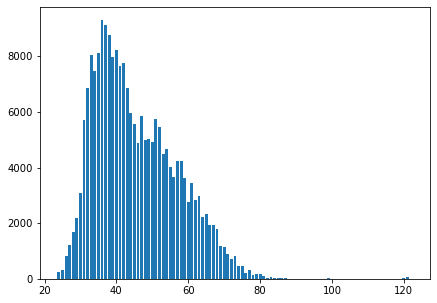

In [64]:
# Based on all my modeling I would market most towards gener 2 ages (30-45). They seem to be the largest users of Citibike.
x = citibike.groupby(['age'])['age'].agg('count')
plt.figure(figsize=(7,5))
plt.bar(x.keys(),x.values);